# Authored by Amirul Uzair

# Load Dependencies

In [1]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from pandas import read_csv
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

print("All dependencies imported successfully")

All dependencies imported successfully


# Read Dataset

In [2]:
df = pd.read_csv(r"C:\Users\amiru\Desktop\Data Scientist Final Project\Dataset Acquisitions\mentalhealth_dataset.csv")
df

,Timestamp,Gender,Age,Course,YearOfStudy,CGPA,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement
0,13/7/2020,Female,24,Biotechnology,Year 3,2.38,1,0,0,0,5,0,4,5,8,2
1,13/7/2020,Female,18,Biotechnology,Year 3,4.00,0,1,0,0,0,0,4,4,13,5
2,13/7/2020,Female,25,Biotechnology,Year 3,3.68,0,0,1,0,3,0,1,2,13,1
3,13/7/2020,Female,18,Engineering,year 4,4.00,0,0,0,0,3,0,5,1,19,2
4,13/7/2020,Female,20,Engineering,year 4,2.00,1,1,0,0,0,0,2,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-07-09,Female,20,KOE,year 1,2.31,0,1,0,0,6,0,1,3,7,1
996,2023-07-09,Female,23,Engineering,year 1,3.72,1,0,0,0,3,0,4,1,12,2
997,2023-07-09,Female,19,Human Sciences,Year 2,2.00,0,0,1,0,1,0,5,4,3,1
998,2023-07-09,Female,24,Human Sciences,Year 2,3.89,1,0,1,0,5,0,5,4,13,3


# Glimpse of Dataset

In [3]:
df.shape

(1000, 16)

In [4]:
df.info

<bound method DataFrame.info of       Timestamp  Gender  Age           Course YearOfStudy  CGPA  Depression  \
0     13/7/2020  Female   24    Biotechnology      Year 3  2.38           1   
1     13/7/2020  Female   18    Biotechnology      Year 3  4.00           0   
2     13/7/2020  Female   25    Biotechnology      Year 3  3.68           0   
3     13/7/2020  Female   18      Engineering      year 4  4.00           0   
4     13/7/2020  Female   20      Engineering      year 4  2.00           1   
..          ...     ...  ...              ...         ...   ...         ...   
995  2023-07-09  Female   20              KOE      year 1  2.31           0   
996  2023-07-09  Female   23      Engineering      year 1  3.72           1   
997  2023-07-09  Female   19  Human Sciences       Year 2  2.00           0   
998  2023-07-09  Female   24  Human Sciences       Year 2  3.89           1   
999  2023-07-09  Female   20  Human Sciences       Year 2  2.46           1   

     Anxiety  Panic

In [5]:
df.dtypes

Timestamp                      object
Gender                         object
Age                             int64
Course                         object
YearOfStudy                    object
CGPA                          float64
Depression                      int64
Anxiety                         int64
PanicAttack                     int64
SpecialistTreatment             int64
SymptomFrequency_Last7Days      int64
HasMentalHealthSupport          int64
SleepQuality                    int64
StudyStressLevel                int64
StudyHoursPerWeek               int64
AcademicEngagement              int64
dtype: object

In [6]:
df.head()

,Timestamp,Gender,Age,Course,YearOfStudy,CGPA,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement
0,13/7/2020,Female,24,Biotechnology,Year 3,2.38,1,0,0,0,5,0,4,5,8,2
1,13/7/2020,Female,18,Biotechnology,Year 3,4.00,0,1,0,0,0,0,4,4,13,5
2,13/7/2020,Female,25,Biotechnology,Year 3,3.68,0,0,1,0,3,0,1,2,13,1
3,13/7/2020,Female,18,Engineering,year 4,4.00,0,0,0,0,3,0,5,1,19,2
4,13/7/2020,Female,20,Engineering,year 4,2.00,1,1,0,0,0,0,2,4,3,2


In [7]:
df.tail()

,Timestamp,Gender,Age,Course,YearOfStudy,CGPA,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement
995,2023-07-09,Female,20,KOE,year 1,2.31,0,1,0,0,6,0,1,3,7,1
996,2023-07-09,Female,23,Engineering,year 1,3.72,1,0,0,0,3,0,4,1,12,2
997,2023-07-09,Female,19,Human Sciences,Year 2,2.00,0,0,1,0,1,0,5,4,3,1
998,2023-07-09,Female,24,Human Sciences,Year 2,3.89,1,0,1,0,5,0,5,4,13,3
999,2023-07-09,Female,20,Human Sciences,Year 2,2.46,1,0,0,0,0,0,2,5,8,1


## Unique Values

In [8]:
for col in df.columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'Timestamp': ['13/7/2020' '18/7/2020' '2020-07-08' '2020-07-09' '13/7/2021' '18/7/2021'
 '2021-07-08' '2021-07-09' '13/7/2022' '18/7/2022' '2022-07-08'
 '2022-07-09' '13/7/2023' '18/7/2023' '2023-07-08' '2023-07-09']
Unique values in column 'Gender': ['Female' 'Male']
Unique values in column 'Age': [24 18 25 20 19 21 23 22]
Unique values in column 'Course': ['Biotechnology' 'Engineering' 'Communication ' 'Diploma Nursing'
 'Pendidikan Islam ' 'Radiography' 'psychology' 'Fiqh fatwa ' 'BIT'
 'DIPLOMA TESL' 'Koe' 'KOE' 'BENL' 'Fiqh' 'Islamic Education' 'BCS'
 'Nursing ' 'Pendidikan Islam' 'Biomedical science' 'Islamic education'
 'Laws' 'Mathemathics' 'Pendidikan islam' 'Human Resources' 'Irkhs'
 'Psychology' 'KENMS' 'Accounting ' 'ENM' 'Marine science'
 'Banking Studies' 'Business Administration' 'Law' 'KIRKHS' 'Usuluddin '
 'TAASL' 'Engine' 'koe' 'Kirkhs' 'CTS' 'engin' 'Econs' 'MHSC' 'Malcom'
 'Kop' 'Human Sciences ' 'ALA' 'Benl' 'IT']
Unique values in column 'Ye

# Data Cleaning 

## Assign CGPA as Target Label

In [9]:
# Move 'cgpa' to the last column and drop its original position
# Extract 'cgpa' column and drop from original position
cgpa_column = df.pop('CGPA')

# Append the 'cgpa' column to the end of the DataFrame
df['CGPA'] = cgpa_column

# Verify the new column order
print(df.columns.tolist())
df

['Timestamp', 'Gender', 'Age', 'Course', 'YearOfStudy', 'Depression', 'Anxiety', 'PanicAttack', 'SpecialistTreatment', 'SymptomFrequency_Last7Days', 'HasMentalHealthSupport', 'SleepQuality', 'StudyStressLevel', 'StudyHoursPerWeek', 'AcademicEngagement', 'CGPA']


,Timestamp,Gender,Age,Course,YearOfStudy,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement,CGPA
0,13/7/2020,Female,24,Biotechnology,Year 3,1,0,0,0,5,0,4,5,8,2,2.38
1,13/7/2020,Female,18,Biotechnology,Year 3,0,1,0,0,0,0,4,4,13,5,4.00
2,13/7/2020,Female,25,Biotechnology,Year 3,0,0,1,0,3,0,1,2,13,1,3.68
3,13/7/2020,Female,18,Engineering,year 4,0,0,0,0,3,0,5,1,19,2,4.00
4,13/7/2020,Female,20,Engineering,year 4,1,1,0,0,0,0,2,4,3,2,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-07-09,Female,20,KOE,year 1,0,1,0,0,6,0,1,3,7,1,2.31
996,2023-07-09,Female,23,Engineering,year 1,1,0,0,0,3,0,4,1,12,2,3.72
997,2023-07-09,Female,19,Human Sciences,Year 2,0,0,1,0,1,0,5,4,3,1,2.00
998,2023-07-09,Female,24,Human Sciences,Year 2,1,0,1,0,5,0,5,4,13,3,3.89


## Checking for  Missing Values

In [10]:
df.isnull()

,Timestamp,Gender,Age,Course,YearOfStudy,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement,CGPA
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# Extract rows and columns where data is missing
missing_values = df[df.isnull().any(axis=1)][df.columns[df.isnull().any(axis=0)]]
print("\nRows and columns with missing values:")
print(missing_values)


Rows and columns with missing values:
Empty DataFrame
Columns: []
Index: []


## Checking for Duplicated Values

In [12]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]

print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
print()
if duplicate_rows.shape[0] > 0:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0

No duplicate rows found.


## Drop Unnecessary Column

In [13]:
df = df.drop(["Timestamp", "Course"], axis=1)

In [14]:
df

,Gender,Age,YearOfStudy,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement,CGPA
0,Female,24,Year 3,1,0,0,0,5,0,4,5,8,2,2.38
1,Female,18,Year 3,0,1,0,0,0,0,4,4,13,5,4.00
2,Female,25,Year 3,0,0,1,0,3,0,1,2,13,1,3.68
3,Female,18,year 4,0,0,0,0,3,0,5,1,19,2,4.00
4,Female,20,year 4,1,1,0,0,0,0,2,4,3,2,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Female,20,year 1,0,1,0,0,6,0,1,3,7,1,2.31
996,Female,23,year 1,1,0,0,0,3,0,4,1,12,2,3.72
997,Female,19,Year 2,0,0,1,0,1,0,5,4,3,1,2.00
998,Female,24,Year 2,1,0,1,0,5,0,5,4,13,3,3.89


# Convert Categorical Data to Numerical

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Assuming 'Gender' is the column with 'Male' and 'Female'
df['Gender'] = le.fit_transform(df['Gender'])

# Show the label encoding mapping (male -> 0, female -> 1)
encoding_map = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Encoding Map:", encoding_map)
print()

# Verify the result
print(df[['Gender']])

Label Encoding Map: {'Female': 0, 'Male': 1}

     Gender
0         0
1         0
2         0
3         0
4         0
..      ...
995       0
996       0
997       0
998       0
999       0

[1000 rows x 1 columns]


In [16]:
# Remove 'year' regardless of case
df['YearOfStudy'] = df['YearOfStudy'].str.replace(r'(?i)year', '', regex=True)

# Convert the result to integers 
df['YearOfStudy'] = pd.to_numeric(df['YearOfStudy'], errors='coerce')

# Verify the result
print(df[['YearOfStudy']])

     YearOfStudy
0              3
1              3
2              3
3              4
4              4
..           ...
995            1
996            1
997            2
998            2
999            2

[1000 rows x 1 columns]


In [17]:
df

,Gender,Age,YearOfStudy,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement,CGPA
0,0,24,3,1,0,0,0,5,0,4,5,8,2,2.38
1,0,18,3,0,1,0,0,0,0,4,4,13,5,4.00
2,0,25,3,0,0,1,0,3,0,1,2,13,1,3.68
3,0,18,4,0,0,0,0,3,0,5,1,19,2,4.00
4,0,20,4,1,1,0,0,0,0,2,4,3,2,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,20,1,0,1,0,0,6,0,1,3,7,1,2.31
996,0,23,1,1,0,0,0,3,0,4,1,12,2,3.72
997,0,19,2,0,0,1,0,1,0,5,4,3,1,2.00
998,0,24,2,1,0,1,0,5,0,5,4,13,3,3.89


## Verify All Features to be Numerical

In [18]:
df.dtypes

Gender                          int32
Age                             int64
YearOfStudy                     int64
Depression                      int64
Anxiety                         int64
PanicAttack                     int64
SpecialistTreatment             int64
SymptomFrequency_Last7Days      int64
HasMentalHealthSupport          int64
SleepQuality                    int64
StudyStressLevel                int64
StudyHoursPerWeek               int64
AcademicEngagement              int64
CGPA                          float64
dtype: object

In [19]:
df

,Gender,Age,YearOfStudy,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement,CGPA
0,0,24,3,1,0,0,0,5,0,4,5,8,2,2.38
1,0,18,3,0,1,0,0,0,0,4,4,13,5,4.00
2,0,25,3,0,0,1,0,3,0,1,2,13,1,3.68
3,0,18,4,0,0,0,0,3,0,5,1,19,2,4.00
4,0,20,4,1,1,0,0,0,0,2,4,3,2,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,20,1,0,1,0,0,6,0,1,3,7,1,2.31
996,0,23,1,1,0,0,0,3,0,4,1,12,2,3.72
997,0,19,2,0,0,1,0,1,0,5,4,3,1,2.00
998,0,24,2,1,0,1,0,5,0,5,4,13,3,3.89


## Final Cleaned Data

In [20]:
# Reset index and drop the old index
df = df.reset_index(drop=True)

df

,Gender,Age,YearOfStudy,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement,CGPA
0,0,24,3,1,0,0,0,5,0,4,5,8,2,2.38
1,0,18,3,0,1,0,0,0,0,4,4,13,5,4.00
2,0,25,3,0,0,1,0,3,0,1,2,13,1,3.68
3,0,18,4,0,0,0,0,3,0,5,1,19,2,4.00
4,0,20,4,1,1,0,0,0,0,2,4,3,2,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,20,1,0,1,0,0,6,0,1,3,7,1,2.31
996,0,23,1,1,0,0,0,3,0,4,1,12,2,3.72
997,0,19,2,0,0,1,0,1,0,5,4,3,1,2.00
998,0,24,2,1,0,1,0,5,0,5,4,13,3,3.89


# Descriptive Statistical Analysis

## Describe Data

In [21]:
df.describe()

,Gender,Age,YearOfStudy,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement,CGPA
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.240000,21.402000,1.976000,0.483000,0.474000,0.458000,0.067000,3.4980,0.067000,2.983000,3.045000,9.746000,3.055000,3.122530
std,0.427297,2.373611,0.973844,0.499961,0.499573,0.498482,0.250147,2.3081,0.250147,1.417999,1.417386,5.651497,1.422673,0.810961
min,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,0.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.7500,0.000000,2.000000,2.000000,5.000000,2.000000,2.250000
50%,0.000000,21.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.0000,0.000000,3.000000,3.000000,9.000000,3.000000,3.250000
75%,0.000000,24.000000,3.000000,1.000000,1.000000,1.000000,0.000000,6.0000,0.000000,4.000000,4.000000,15.000000,4.000000,4.000000
max,1.000000,25.000000,4.000000,1.000000,1.000000,1.000000,1.000000,7.0000,1.000000,5.000000,5.000000,19.000000,5.000000,4.000000


## Measuring Central Tendency

In [22]:
# Select column
columns_to_analyze = df.columns[0:13]

# Calculate mean, median, and mode for each column
mean_values = df[columns_to_analyze].mean()
median_values = df[columns_to_analyze].median()
mode_values = df[columns_to_analyze].mode().iloc[0]

# Display the results
print("Mean values for features:")
print(mean_values)
print("\nMedian values for features:")
print(median_values)
print("\nMode values for features:")
print(mode_values)

Mean values for features:
Gender                         0.240
Age                           21.402
YearOfStudy                    1.976
Depression                     0.483
Anxiety                        0.474
PanicAttack                    0.458
SpecialistTreatment            0.067
SymptomFrequency_Last7Days     3.498
HasMentalHealthSupport         0.067
SleepQuality                   2.983
StudyStressLevel               3.045
StudyHoursPerWeek              9.746
AcademicEngagement             3.055
dtype: float64

Median values for features:
Gender                         0.0
Age                           21.0
YearOfStudy                    2.0
Depression                     0.0
Anxiety                        0.0
PanicAttack                    0.0
SpecialistTreatment            0.0
SymptomFrequency_Last7Days     3.0
HasMentalHealthSupport         0.0
SleepQuality                   3.0
StudyStressLevel               3.0
StudyHoursPerWeek              9.0
AcademicEngagement           

## Measures of Variability

In [23]:
# Select column
columns_to_analyze = df.columns[0:13]

# Calculate standard deviation, variance, and range for each numerical column
std_values = df[columns_to_analyze].std()
variance_values = df[columns_to_analyze].var()
range_values = df[columns_to_analyze].max() - df[columns_to_analyze].min()

# Display the results
print("Standard Deviation values for numerical features:")
print(std_values)
print("\nVariance values for numerical features:")
print(variance_values)
print("\nRange values for numerical features:")
print(range_values)

Standard Deviation values for numerical features:
Gender                        0.427297
Age                           2.373611
YearOfStudy                   0.973844
Depression                    0.499961
Anxiety                       0.499573
PanicAttack                   0.498482
SpecialistTreatment           0.250147
SymptomFrequency_Last7Days    2.308100
HasMentalHealthSupport        0.250147
SleepQuality                  1.417999
StudyStressLevel              1.417386
StudyHoursPerWeek             5.651497
AcademicEngagement            1.422673
dtype: float64

Variance values for numerical features:
Gender                         0.182583
Age                            5.634030
YearOfStudy                    0.948372
Depression                     0.249961
Anxiety                        0.249574
PanicAttack                    0.248484
SpecialistTreatment            0.062574
SymptomFrequency_Last7Days     5.327323
HasMentalHealthSupport         0.062574
SleepQuality               

# Distribution of Features

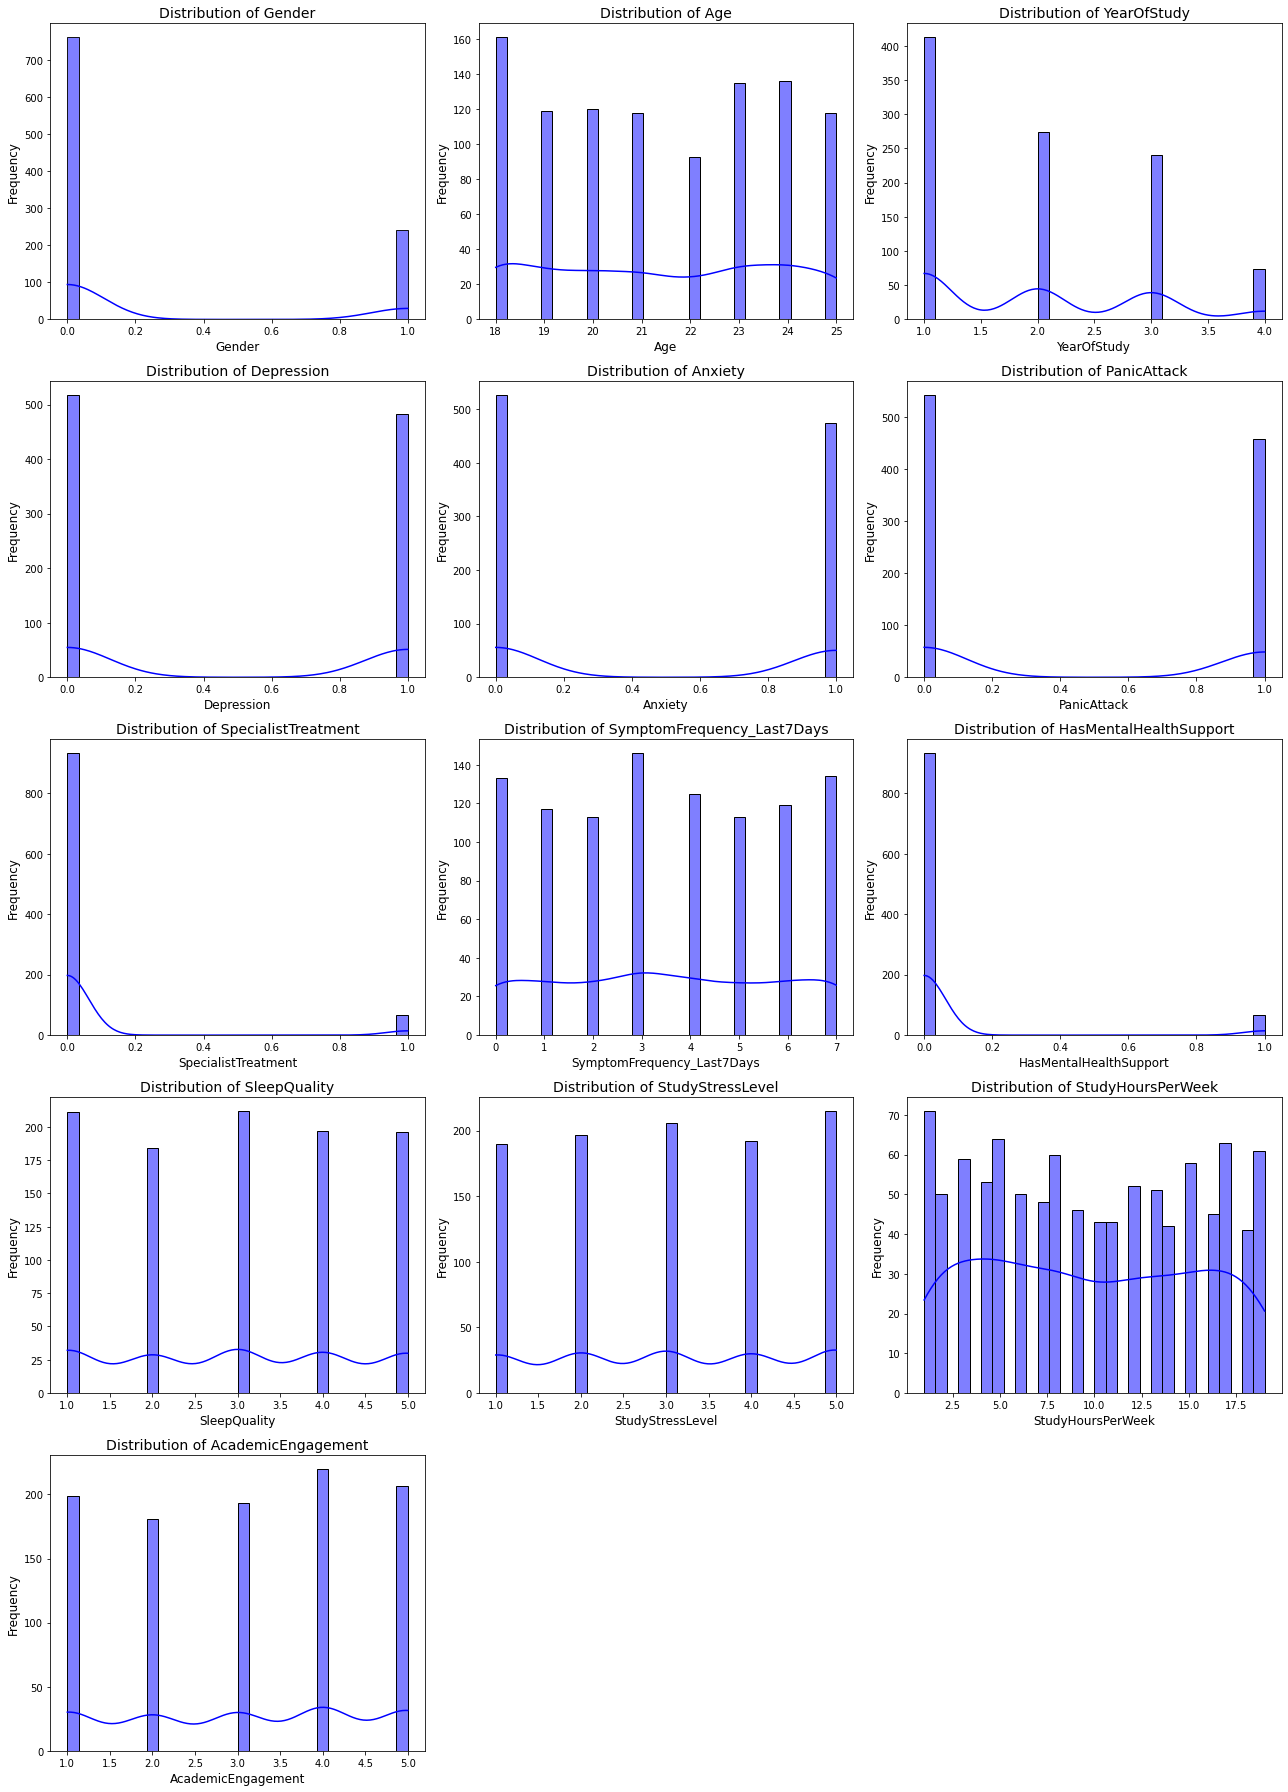

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

df_features = df.drop(columns=[df.columns[13]])

# Visualize the distribution of all features except the target
def plot_distributions(df, cols_per_row=3):
    num_cols = len(df.columns)
    num_rows = (num_cols // cols_per_row) + int(num_cols % cols_per_row > 0)

    plt.figure(figsize=(cols_per_row * 6, num_rows * 5))
    for i, column in enumerate(df.columns, 1):
        plt.subplot(num_rows, cols_per_row, i)
        sns.histplot(df[column], kde=True, bins=30, color='blue', edgecolor='black')
        plt.title(f"Distribution of {column}", fontsize=14)  # Increased title font size
        plt.xlabel(column, fontsize=12)  # Increased x-label font size
        plt.ylabel("Frequency", fontsize=12)  # Increased y-label font size
        plt.tight_layout()
    plt.show()

# Call the function to plot distributions
plot_distributions(df_features, cols_per_row=3)

## Checking for Outliers

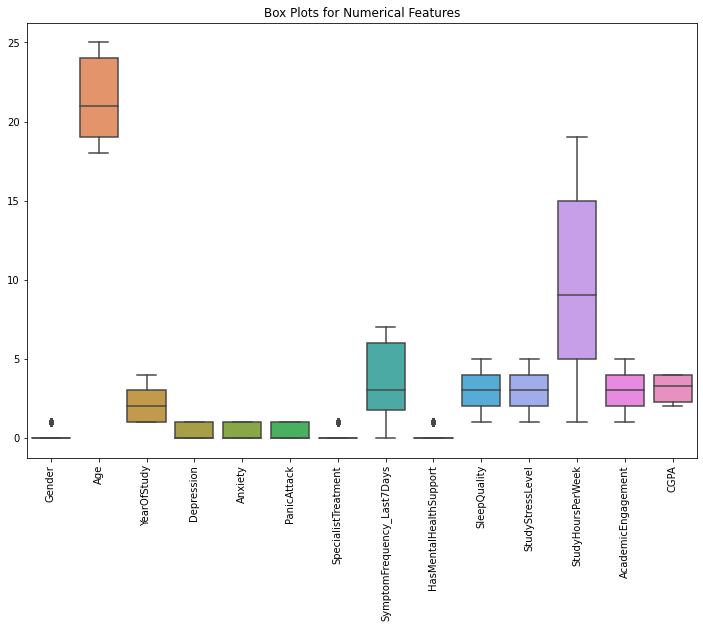

In [25]:
# Plot boxplots for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plots for Numerical Features')
plt.show()

## Verify Outliers using IQR 

In [26]:
# Loop through all columns except 'CGPA'
for column in df.columns:
    if column != 'CGPA':
        # Calculate Q1, Q3, and IQR for each column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the outlier thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Check for outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Print if no outliers are found for the column
        if outliers.empty:
            print(f"No outliers detected in {column}")
        else:
            print(f"Outliers detected in {column}:")
            print(outliers[[column]])


Outliers detected in Gender:
     Gender
13        1
14        1
20        1
21        1
22        1
..      ...
952       1
977       1
978       1
991       1
992       1

[240 rows x 1 columns]
No outliers detected in Age
No outliers detected in YearOfStudy
No outliers detected in Depression
No outliers detected in Anxiety
No outliers detected in PanicAttack
Outliers detected in SpecialistTreatment:
     SpecialistTreatment
15                     1
136                    1
137                    1
151                    1
152                    1
..                   ...
944                    1
945                    1
946                    1
947                    1
948                    1

[67 rows x 1 columns]
No outliers detected in SymptomFrequency_Last7Days
Outliers detected in HasMentalHealthSupport:
     HasMentalHealthSupport
15                        1
136                       1
137                       1
151                       1
152                       1
..     

# Correlation

## Correlation Matrix

In [27]:
correlation_matrix = df.corr("pearson")
correlation_matrix

,Gender,Age,YearOfStudy,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement,CGPA
Gender,1.000000,0.009396,-0.051094,-0.041796,0.005815,-0.013723,-0.000749,-0.051276,-0.000749,0.031522,-0.007933,0.012004,0.006257,0.007808
Age,0.009396,1.000000,0.022799,-0.011106,0.039213,0.024436,0.037201,-0.016297,0.037201,0.023148,-0.031565,-0.032079,0.001450,-0.048808
YearOfStudy,-0.051094,0.022799,1.000000,0.044392,-0.019802,0.016480,-0.071466,0.008440,-0.071466,0.001879,0.014562,-0.038394,0.019739,-0.017389
Depression,-0.041796,-0.011106,0.044392,1.000000,0.048325,-0.004876,-0.018897,0.029030,-0.018897,-0.016646,-0.001038,-0.015346,-0.079605,0.054335
Anxiety,0.005815,0.039213,-0.019802,0.048325,1.000000,0.027768,0.017959,-0.053869,0.017959,-0.019701,0.036289,-0.008723,0.074547,0.037039
PanicAttack,-0.013723,0.024436,0.016480,-0.004876,0.027768,1.000000,-0.037618,-0.032264,-0.037618,-0.001719,0.052973,0.035650,-0.003091,0.070897
SpecialistTreatment,-0.000749,0.037201,-0.071466,-0.018897,0.017959,-0.037618,1.000000,0.002833,1.000000,0.039901,-0.000042,-0.024770,0.037452,-0.015294
SymptomFrequency_Last7Days,-0.051276,-0.016297,0.008440,0.029030,-0.053869,-0.032264,0.002833,1.000000,0.002833,0.036538,-0.050918,0.014848,-0.015666,0.023156
HasMentalHealthSupport,-0.000749,0.037201,-0.071466,-0.018897,0.017959,-0.037618,1.000000,0.002833,1.000000,0.039901,-0.000042,-0.024770,0.037452,-0.015294
SleepQuality,0.031522,0.023148,0.001879,-0.016646,-0.019701,-0.001719,0.039901,0.036538,0.039901,1.000000,0.004863,0.014700,-0.000032,0.047052


## Correlation by Ranking

In [28]:
# Assuming correlation_matrix is already calculated
correlation_with_success = correlation_matrix['CGPA']

# Sort the correlation values in descending order
correlation_ranked = correlation_with_success.sort_values(ascending=False)

# Print the ranked correlation values
print(correlation_ranked)

CGPA                          1.000000
StudyHoursPerWeek             0.932091
AcademicEngagement            0.152381
PanicAttack                   0.070897
Depression                    0.054335
SleepQuality                  0.047052
Anxiety                       0.037039
StudyStressLevel              0.028195
SymptomFrequency_Last7Days    0.023156
Gender                        0.007808
SpecialistTreatment          -0.015294
HasMentalHealthSupport       -0.015294
YearOfStudy                  -0.017389
Age                          -0.048808
Name: CGPA, dtype: float64


## Correlation Heatmap

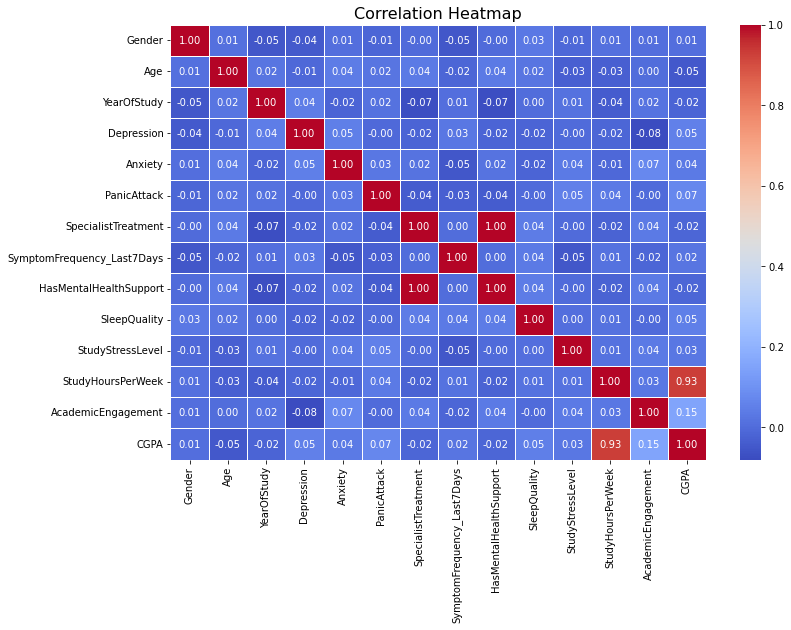

In [29]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the plot
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## Correlation of All Features by Class (Target Label)

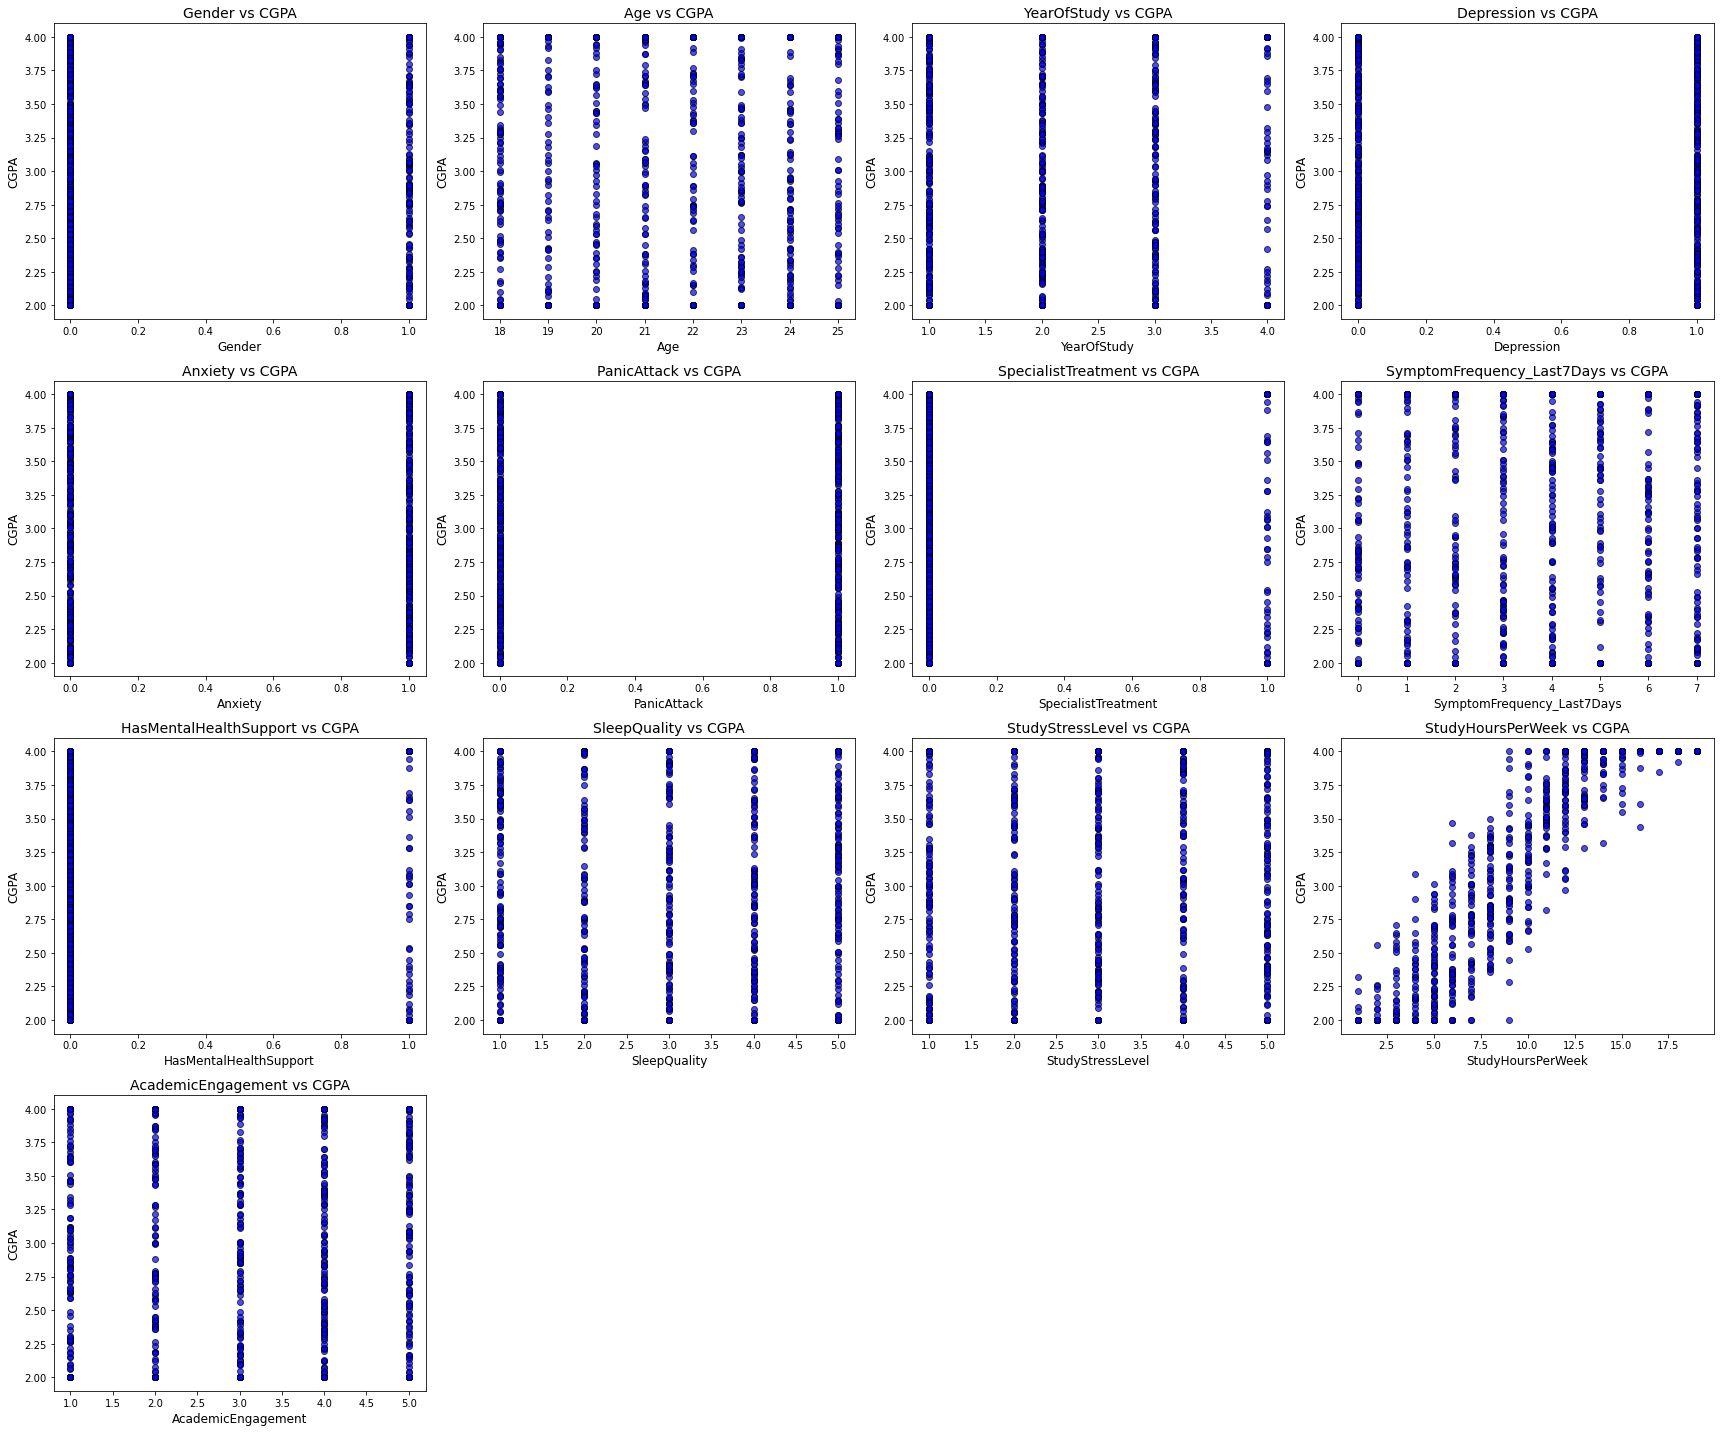

In [30]:
# Define features and target
features = df.columns[:13]
target = df.columns[13]

# Function to plot scatter plots for each feature against the target
def plot_scatter_features_vs_target(df, features, target, cols_per_row=4):
    num_features = len(features)
    num_rows = (num_features // cols_per_row) + int(num_features % cols_per_row > 0)

    plt.figure(figsize=(cols_per_row * 6, num_rows * 5))  # Adjust figure size for better readability
    for i, feature in enumerate(features, 1):
        plt.subplot(num_rows, cols_per_row, i)
        plt.scatter(df[feature], df[target], alpha=0.7, c='blue', edgecolor='k')
        plt.title(f'{feature} vs {target}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel(target, fontsize=12)
        plt.tight_layout()
    plt.show()

# Call the function to plot scatter plots
plot_scatter_features_vs_target(df, features, target, cols_per_row=4)

# Feature Importance

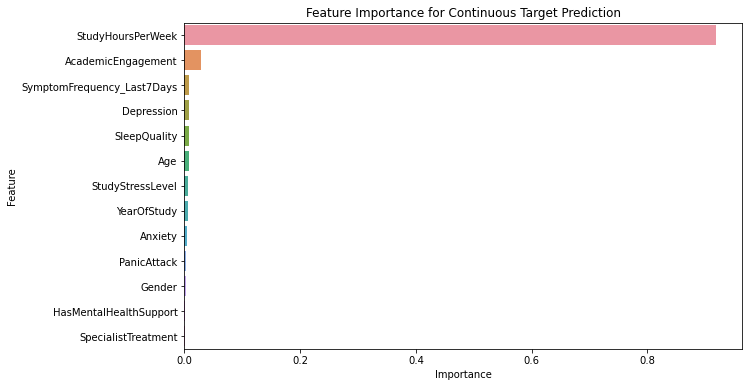

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Prepare data
X = df.drop(columns=['CGPA'])  
y = df['CGPA']  

# Train a Random Forest Regressor model
rf = RandomForestRegressor()
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance for Continuous Target Prediction')
plt.show()

# Relationship Between Attributes

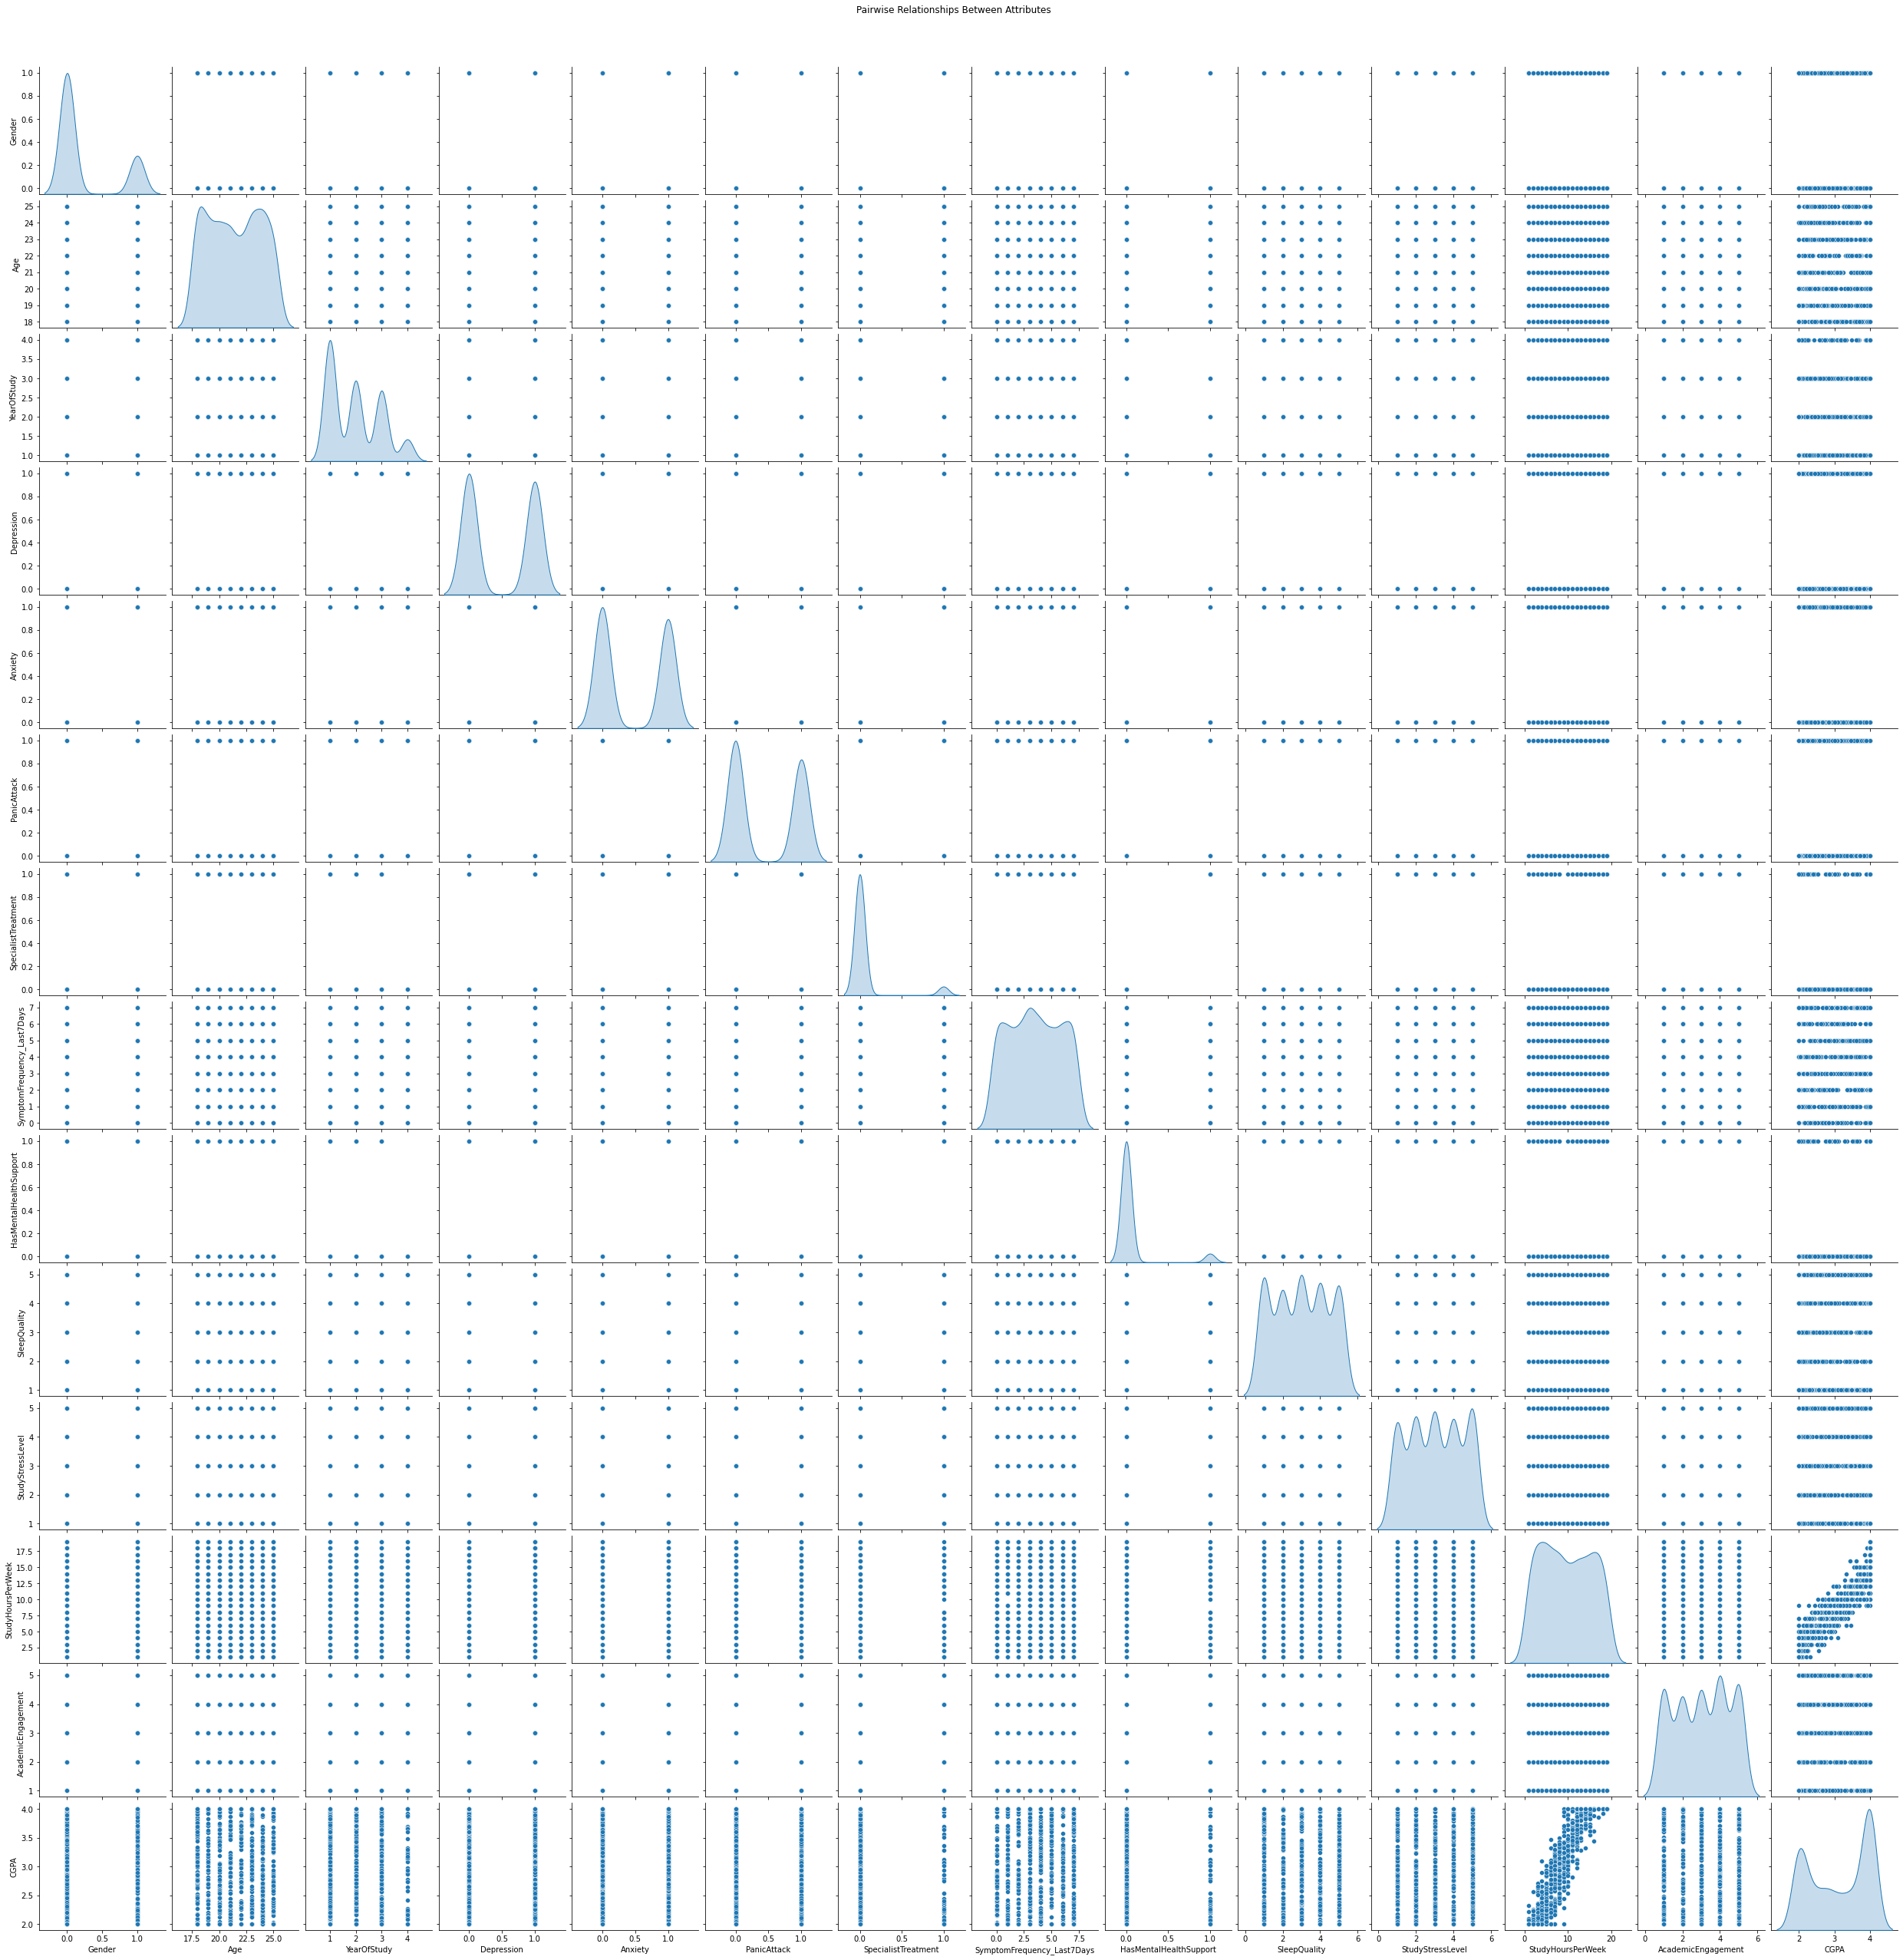

In [32]:
# Pairplot to visualize relationships
sns.pairplot(df, diag_kind="kde")
plt.suptitle("Pairwise Relationships Between Attributes", y=1.02)
plt.show()

# Data Transformation

## Standardizer

In [55]:
from sklearn.preprocessing import StandardScaler

array = df.values
# separate array into input and output components
X = array[:,0:13]
Y = array[:,13]
scaler = StandardScaler()
standardizedX = scaler.fit_transform(X)
#print(X[0:5,:])
print(standardizedX[0:5,:])

[[-0.56195149  1.09508246  1.05202913  1.03459817 -0.9492843  -0.91924885
  -0.26797642  0.65107746 -0.26797642  0.71756661  1.37998949 -0.30909926
  -0.7419328 ]
 [-0.56195149 -1.43397634  1.05202913 -0.96655883  1.05342519 -0.91924885
  -0.26797642 -1.51629092 -0.26797642  0.71756661  0.67411252  0.57606471
   1.36782871]
 [-0.56195149  1.51659226  1.05202913 -0.96655883 -0.9492843   1.08784471
  -0.26797642 -0.21586989 -0.26797642 -1.39914906 -0.73764144  0.57606471
  -1.44518663]
 [-0.56195149 -1.43397634  2.07940133 -0.96655883 -0.9492843  -0.91924885
  -0.26797642 -0.21586989 -0.26797642  1.42313851 -1.44351842  1.63826146
  -0.7419328 ]
 [-0.56195149 -0.59095674  2.07940133  1.03459817  1.05342519 -0.91924885
  -0.26797642 -1.51629092 -0.26797642 -0.69357717  0.67411252 -1.19426322
  -0.7419328 ]]


## Log Scaling

In [46]:
import numpy as np

array = df.values
# Separate array into input and output components
X = array[:, 0:13]
Y = array[:, 13]

# Apply log scaling (adding 1 to avoid log(0))
log_scaled_X = np.log1p(X)

# Print the log-scaled values for the first 5 rows
print(log_scaled_X[0:5, :])

[[0.         3.21887582 1.38629436 0.69314718 0.         0.
  0.         1.79175947 0.         1.60943791 1.79175947 2.19722458
  1.09861229]
 [0.         2.94443898 1.38629436 0.         0.69314718 0.
  0.         0.         0.         1.60943791 1.60943791 2.63905733
  1.79175947]
 [0.         3.25809654 1.38629436 0.         0.         0.69314718
  0.         1.38629436 0.         0.69314718 1.09861229 2.63905733
  0.69314718]
 [0.         2.94443898 1.60943791 0.         0.         0.
  0.         1.38629436 0.         1.79175947 0.69314718 2.99573227
  1.09861229]
 [0.         3.04452244 1.60943791 0.69314718 0.69314718 0.
  0.         0.         0.         1.09861229 1.60943791 1.38629436
  1.09861229]]


## Min-Max Scaler

In [33]:
from sklearn.preprocessing import MinMaxScaler

array = df.values
# separate array into input and output components
X = array[:,0:13]
Y = array[:,13]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
#print(X[0:5,:])
print(rescaledX[0:5,:])

[[0.         0.85714286 0.66666667 1.         0.         0.
  0.         0.71428571 0.         0.75       1.         0.38888889
  0.25      ]
 [0.         0.         0.66666667 0.         1.         0.
  0.         0.         0.         0.75       0.75       0.66666667
  1.        ]
 [0.         1.         0.66666667 0.         0.         1.
  0.         0.42857143 0.         0.         0.25       0.66666667
  0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.42857143 0.         1.         0.         1.
  0.25      ]
 [0.         0.28571429 1.         1.         1.         0.
  0.         0.         0.         0.25       0.75       0.11111111
  0.25      ]]


In [34]:
#Verify total rows and columns are matched

# Print the dimensions of rescaledX
print("Total Rows in rescaledX:", rescaledX.shape[0])
print("Total Columns in rescaledX:", rescaledX.shape[1])

# Compare with the first 13 columns of df
df_subset = df.iloc[:, :13]  # Select the first 13 columns
print("Total Rows in df (first 13 columns):", df_subset.shape[0])
print("Total Columns in df (first 13 columns):", df_subset.shape[1])

# Check if the totals match
if rescaledX.shape == df_subset.shape:
    print("\nThe total rows and columns match!")
else:
    print("\nThe totals do not match.")
print()
rescaledX

Total Rows in rescaledX: 1000
Total Columns in rescaledX: 13
Total Rows in df (first 13 columns): 1000
Total Columns in df (first 13 columns): 13

The total rows and columns match!



array([[0.        , 0.85714286, 0.66666667, ..., 1.        , 0.38888889,
        0.25      ],
       [0.        , 0.        , 0.66666667, ..., 0.75      , 0.66666667,
        1.        ],
       [0.        , 1.        , 0.66666667, ..., 0.25      , 0.66666667,
        0.        ],
       ...,
       [0.        , 0.14285714, 0.33333333, ..., 0.75      , 0.11111111,
        0.        ],
       [0.        , 0.85714286, 0.33333333, ..., 0.75      , 0.66666667,
        0.5       ],
       [0.        , 0.28571429, 0.33333333, ..., 1.        , 0.38888889,
        0.        ]])

In [35]:
print(len(Y))
print()
Y

1000



array([2.38, 4.  , 3.68, 4.  , 2.  , 4.  , 2.  , 2.72, 2.3 , 4.  , 4.  ,
       2.  , 4.  , 2.  , 2.84, 3.28, 4.  , 2.12, 2.  , 4.  , 2.59, 4.  ,
       3.98, 4.  , 3.51, 2.  , 2.  , 3.12, 4.  , 2.  , 2.89, 2.  , 2.  ,
       2.  , 4.  , 2.  , 4.  , 2.  , 4.  , 4.  , 3.38, 3.61, 3.77, 3.47,
       2.58, 3.36, 2.89, 4.  , 3.5 , 2.38, 4.  , 3.39, 4.  , 3.95, 4.  ,
       2.  , 3.25, 3.12, 2.  , 3.25, 2.  , 2.  , 4.  , 4.  , 2.75, 4.  ,
       2.77, 3.3 , 3.96, 2.  , 4.  , 2.  , 2.9 , 4.  , 2.43, 2.  , 3.77,
       4.  , 3.65, 4.  , 2.42, 2.  , 4.  , 4.  , 4.  , 2.61, 2.  , 2.  ,
       2.91, 4.  , 4.  , 4.  , 4.  , 2.  , 3.53, 4.  , 2.28, 3.65, 3.64,
       2.15, 2.69, 2.  , 2.83, 4.  , 4.  , 2.49, 3.35, 4.  , 3.32, 4.  ,
       2.72, 2.  , 2.71, 2.42, 2.77, 4.  , 3.09, 2.61, 2.  , 4.  , 3.46,
       2.  , 3.46, 2.69, 4.  , 3.7 , 2.  , 2.  , 2.7 , 4.  , 4.  , 3.72,
       4.  , 2.89, 4.  , 4.  , 2.93, 2.79, 3.14, 4.  , 2.  , 2.  , 3.43,
       4.  , 2.16, 2.85, 4.  , 4.  , 3.01, 4.  , 3.

# Splitting to Train and Test Data


## Use Non-Transformed Data for Training and Test

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split

array = df.values

# Extract X (features) and y (target)
#X = rescaledX
#X = log_scaled_X
X = array[:,0:13]
#X = standardizedX

y = Y

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
print("Total training data of X:", len(X_train))
print("Total test data of X:", len(X_test))
print()
print("Total training data of Y:", len(y_train))
print("Total test data of Y:", len(y_test))

Total training data of X: 700
Total test data of X: 300

Total training data of Y: 700
Total test data of Y: 300


In [66]:
print(len(X_train))
print()
X_train

700



array([[ 0., 19.,  2., ...,  1., 12.,  1.],
       [ 0., 18.,  2., ...,  3.,  5.,  4.],
       [ 0., 22.,  3., ...,  2., 13.,  2.],
       ...,
       [ 0., 24.,  1., ...,  5., 19.,  3.],
       [ 0., 24.,  1., ...,  1., 18.,  4.],
       [ 1., 20.,  3., ...,  4.,  8.,  4.]])

# Checking for Data Imbalance

## Histogram of CGPA Distribution

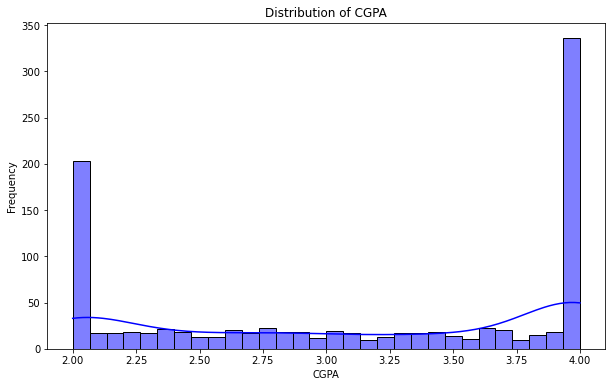

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of CGPA
plt.figure(figsize=(10, 6))
sns.histplot(df['CGPA'], kde=True, bins=30, color='blue')
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

## Measurement of Skewness

In [68]:
# Summary statistics
print(df['CGPA'].describe())

# Check skewness
from scipy.stats import skew
print(f"Skewness of CGPA: {skew(df['CGPA'])}")

count    1000.000000
mean        3.122530
std         0.810961
min         2.000000
25%         2.250000
50%         3.250000
75%         4.000000
max         4.000000
Name: CGPA, dtype: float64
Skewness of CGPA: -0.21613441185513024


## Checking for Outliers

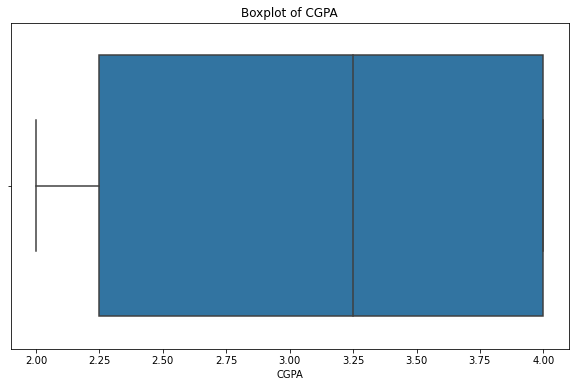

In [69]:
# Boxplot to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['CGPA'])
plt.title('Boxplot of CGPA')
plt.xlabel('CGPA')
plt.show()

## Density Plot

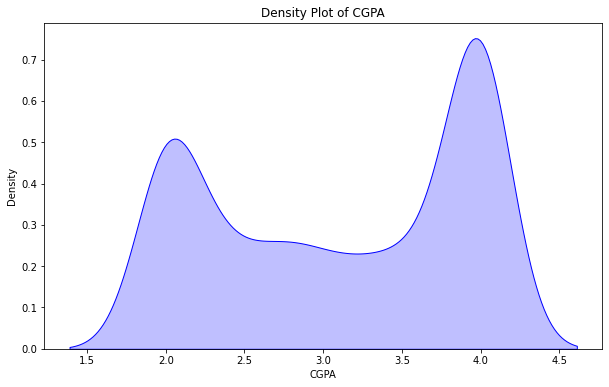

In [70]:
# Density plot for CGPA
plt.figure(figsize=(10, 6))
sns.kdeplot(df['CGPA'], shade=True, color='blue')
plt.title('Density Plot of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Density')
plt.show()

# Train, Test and Evaluate Models


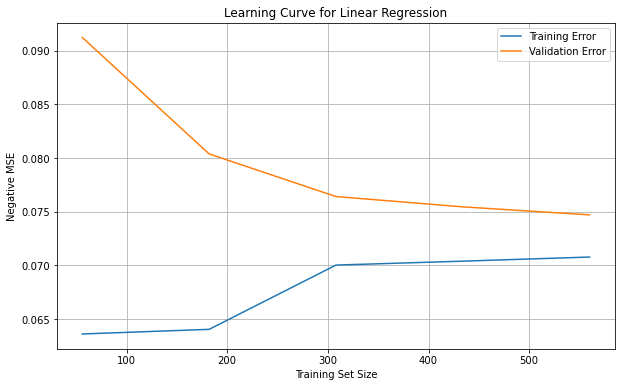

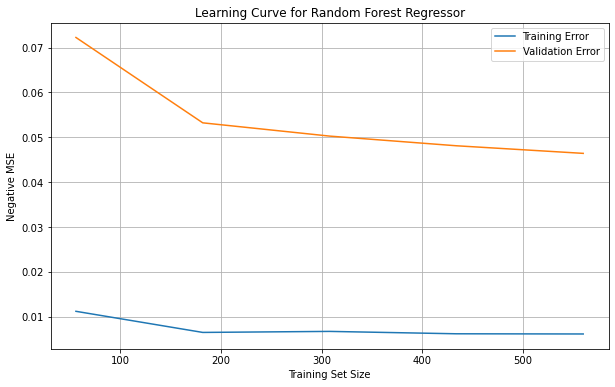

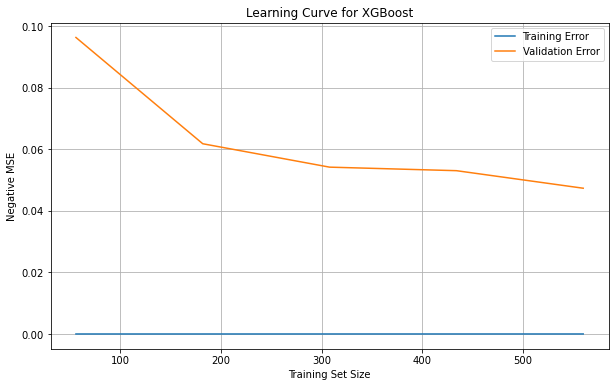

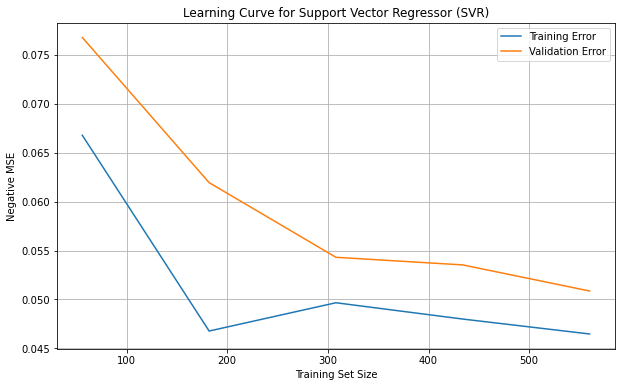

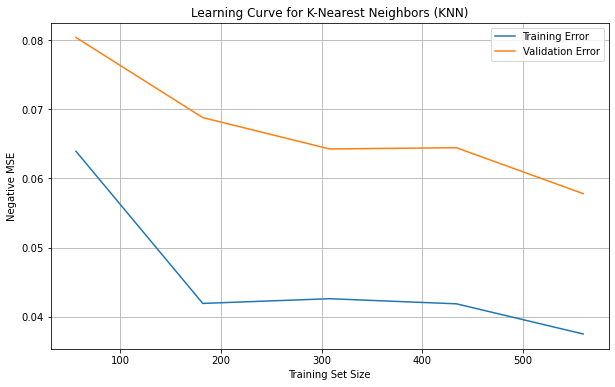

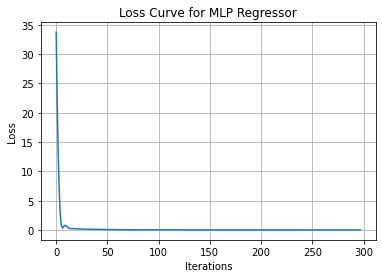

Results for Linear Regression:
MAE: 0.2087
MSE: 0.0628
RMSE: 0.2506
R²: 0.9065

Results for Random Forest Regressor:
MAE: 0.1270
MSE: 0.0388
RMSE: 0.1970
R²: 0.9422

Results for XGBoost:
MAE: 0.1427
MSE: 0.0496
RMSE: 0.2227
R²: 0.9261

Results for Support Vector Regressor (SVR):
MAE: 0.1468
MSE: 0.0387
RMSE: 0.1967
R²: 0.9424

Results for K-Nearest Neighbors (KNN):
MAE: 0.1396
MSE: 0.0500
RMSE: 0.2236
R²: 0.9255

Results for MLP Regressor:
MAE: 0.1761
MSE: 0.0530
RMSE: 0.2303
R²: 0.9210



In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
import xgboost as xgb

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'Support Vector Regressor (SVR)': SVR(),
    'K-Nearest Neighbors (KNN)': KNeighborsRegressor(),
    'MLP Regressor': MLPRegressor(max_iter=1000)
}

# Prepare the results dictionary
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    }
    
    # Plot Learning curve (for models that support it)
    if model_name != 'MLP Regressor':
        train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        
        plt.figure(figsize=(10, 6))
        plt.plot(train_sizes, -train_scores.mean(axis=1), label="Training Error")
        plt.plot(train_sizes, -test_scores.mean(axis=1), label="Validation Error")
        plt.title(f'Learning Curve for {model_name}')
        plt.xlabel('Training Set Size')
        plt.ylabel('Negative MSE')
        plt.legend()
        plt.grid(True)
        plt.show()

    # Plot Loss curve for MLP Regressor
    if model_name == 'MLP Regressor':
        plt.plot(model.loss_curve_)
        plt.title(f'Loss Curve for {model_name}')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.grid(True)
        plt.show()

# Output the evaluation metrics
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    print(f"MAE: {metrics['MAE']:.4f}")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"RMSE: {metrics['RMSE']:.4f}")
    print(f"R²: {metrics['R²']:.4f}\n")


# Comparison of Prediction Output for Each Model 

In [72]:
# Create a dictionary to store predictions for each model
test_predictions = {}

# Loop through each model, make predictions, and store them
for model_name, model in models.items():
    y_pred = model.predict(X_test)  # Predict on the test set|
    test_predictions[model_name] = y_pred

# Convert the predictions dictionary into a DataFrame for better readability
predictions_df = pd.DataFrame(test_predictions)

# Add the actual values for comparison
predictions_df['Actual'] = y_test

# Display the predictions
predictions_df

,Linear Regression,Random Forest Regressor,XGBoost,Support Vector Regressor (SVR),K-Nearest Neighbors (KNN),MLP Regressor,Actual
0,3.189774,3.6518,3.524912,3.383386,3.762,3.157681,3.49
1,4.189629,3.9976,4.042435,4.094928,4.000,4.130019,4.00
2,2.613944,2.4365,2.359975,2.701246,2.546,2.519174,3.01
3,2.327661,2.0167,1.939151,2.203797,2.234,1.919668,2.12
4,4.215234,3.9990,3.995707,4.138405,4.000,4.071000,4.00
...,...,...,...,...,...,...,...
295,4.242998,3.9848,3.961434,4.079067,4.000,3.963505,4.00
296,2.362829,2.2665,2.149332,2.319692,2.272,2.168192,2.05
297,2.457672,2.2889,2.330664,2.413694,2.604,2.312763,2.19
298,2.681817,2.5936,2.449291,2.796443,2.584,2.648929,2.72
